In [262]:
import pandas as pd

import matplotlib.pyplot as plt

In [263]:
df_pts =pd.read_csv('df_pts.csv', index_col=0)
df_sch = pd.read_csv('df_sch.csv', index_col=0)
df_tm = pd.read_csv('df_tm.csv', index_col=0)
df_tm1 = pd.read_csv('df_tm1.csv', index_col=0)

In [264]:
teams = df_tm.merge(df_tm1)

In [265]:
tm_owners = teams[['TeamID','Year','First','Last']]

In [266]:
total_matchups = df_pts.merge(tm_owners)


In [267]:
total_matchups['First'] = total_matchups['First'].str.capitalize()
total_matchups['Last'] = total_matchups['Last'].str.capitalize()

In [268]:
total_matchups.drop_duplicates(inplace=True)

In [269]:

total_matchups['Full Name'] = total_matchups['First'] + " "+ total_matchups['Last']

In [270]:
df_sch['Matchup_ID'] = df_sch['Year'].astype(str) + df_sch['Week'].astype(str)  + df_sch['HomeTeamId'].astype(str) + df_sch['AwayTeamId'].astype(str) 

In [271]:
df_sch_a = df_sch[['Year','Week','Matchup_ID','Type','AwayTeamId']].rename(columns={'AwayTeamId':'TeamID'})
df_sch_h = df_sch[['Year','Week','Matchup_ID','Type','HomeTeamId']].rename(columns={'HomeTeamId':'TeamID'})
df_sch_1 = pd.concat([df_sch_a,df_sch_h])

In [272]:
df_matchups = total_matchups.merge(df_sch_1,how='inner')

In [273]:
df_matchups['Actual_Winner'] = df_matchups.groupby('Matchup_ID')['Apts'].transform(lambda x: (x == x.max()).astype(int))
df_matchups['Optimal_Winner'] = df_matchups.groupby('Matchup_ID')['Opts'].transform(lambda x: (x == x.max()).astype(int))
df_matchups['ESPN_Winner'] = df_matchups.groupby('Matchup_ID')['Epts'].transform(lambda x: (x == x.max()).astype(int))

In [274]:

df_matchups_1 = df_matchups.loc[df_matchups['Full Name']!='Dave Miller']

In [275]:
df_matchups_1['Optimal_Missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Opts']
df_matchups_1['ESPN_missed_Pts'] = df_matchups_1['Apts'] - df_matchups_1['Epts']

C:\Users\sethmiller_ryanlawn\AppData\Local\Temp\ipykernel_11396\1951970540.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sethmiller_ryanlawn\AppData\Local\Temp\ipykernel_11396\1951970540.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:

df_matchups_1.loc[df_matchups_1['Full Name']=='Nick  Vgts','Full Name']="Nick Vogts"
df_matchups_1.loc[df_matchups_1['Full Name']=='Nick Vgts','Full Name']="Nick Vogts"

In [277]:
df_sorted = df_matchups_1.sort_values(by=['Matchup_ID', 'TeamID']).reset_index(drop=True)

# Shift the Apts column up and down to align with the opponent's values
df_sorted['Opponent_Apts'] = df_sorted['Apts'].shift(-1)
df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Apts'] = df_sorted['Apts'].shift(1)

df_sorted['Opponent_Opts'] = df_sorted['Opts'].shift(-1)
df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Opts'] = df_sorted['Opts'].shift(1)

#df_sorted['Opponent_Opts'] = df_sorted['Opts'].shift(-1)
#df_sorted.loc[df_sorted['Matchup_ID'] != df_sorted['Matchup_ID'].shift(-1), 'Opponent_Opts'] = df_sorted['Opts'].shift(1)

df_matchups_2 = df_matchups_1.merge(df_sorted)

In [278]:
df_Avg_Missed_Optimal = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name'])["Optimal_Missed_Pts"].mean().reset_index().sort_values(by='Optimal_Missed_Pts')

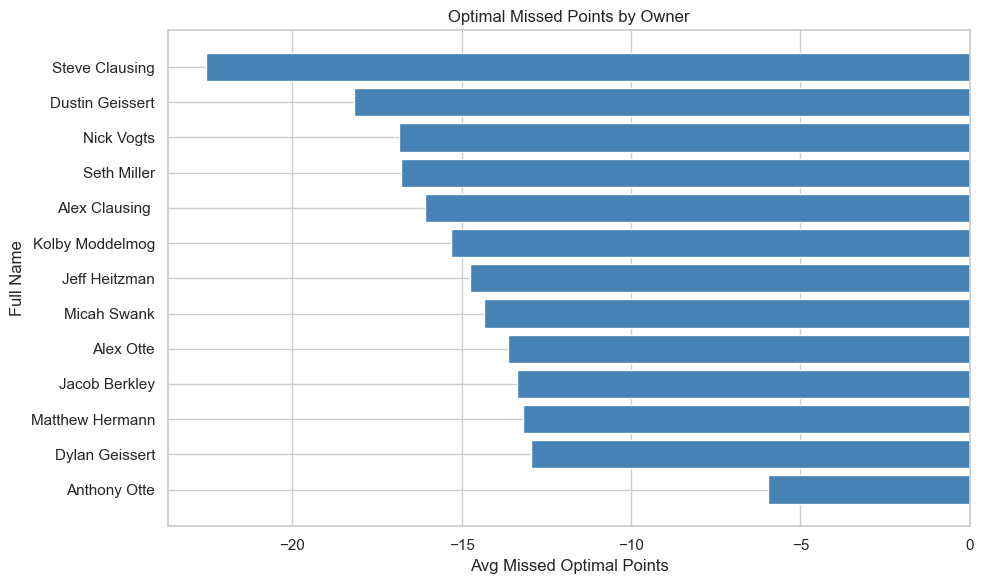

In [279]:
plt.figure(figsize=(10, 6))
plt.barh(df_Avg_Missed_Optimal['Full Name'], df_Avg_Missed_Optimal['Optimal_Missed_Pts'], color='steelblue')
plt.xlabel('Avg Missed Optimal Points')
plt.ylabel('Full Name')
plt.title('Optimal Missed Points by Owner')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
plt.tight_layout()

# Show plot
plt.show()

In [280]:
df_ESPN_Mngr = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name'])["ESPN_missed_Pts"].mean().reset_index().sort_values(by='ESPN_missed_Pts')


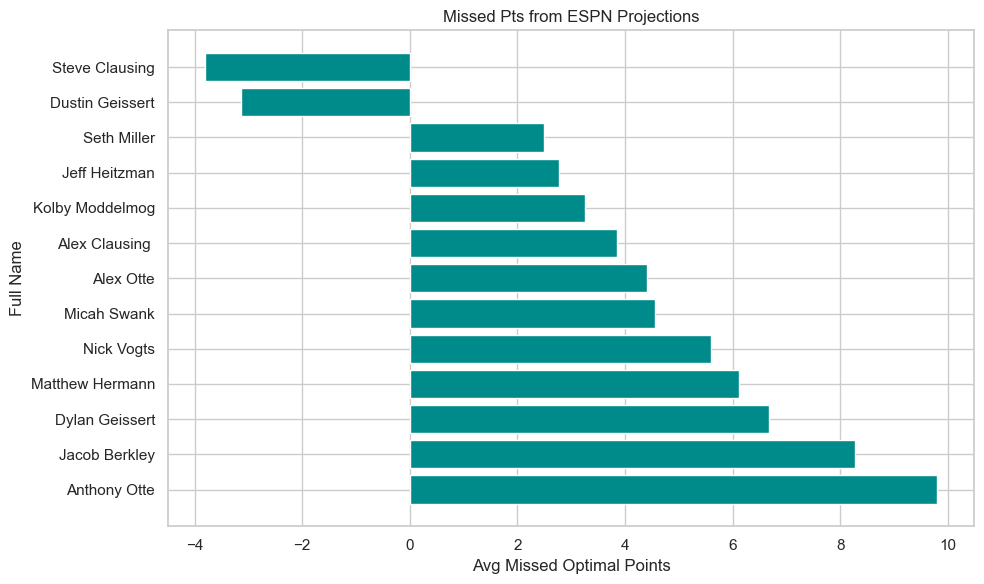

In [281]:
plt.figure(figsize=(10, 6))
plt.barh(df_ESPN_Mngr['Full Name'], df_ESPN_Mngr['ESPN_missed_Pts'], color='darkcyan')
plt.xlabel('Avg Missed Optimal Points')
plt.ylabel('Full Name')
plt.title('Missed Pts from ESPN Projections')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
plt.tight_layout()

# Show plot
plt.show()

In [282]:
df_opts_season =df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])["Optimal_Missed_Pts"].mean().reset_index().sort_values(by='Optimal_Missed_Pts',ascending=False)


In [283]:
df_opts_wins = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])[["Opts",'Actual_Winner']].sum().reset_index().sort_values(by='Opts',ascending=True)


In [284]:

df_Opts_Wins_Yrs = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name']).agg({
    'Opts': 'sum',
    'Actual_Winner': 'sum',
    'Optimal_Winner': 'sum',
    'Year': 'nunique',
    'Matchup_ID': 'count'}).reset_index()

In [285]:
df_Opts_Wins_Yrs['Opts/gm'] = (df_Opts_Wins_Yrs['Opts']/df_Opts_Wins_Yrs['Matchup_ID']).round(1)
df_Opts_Wins_Yrs['Opts/yr'] = (df_Opts_Wins_Yrs['Opts']/df_Opts_Wins_Yrs['Year']).round(1)
df_Opts_Wins_Yrs['Wins/yr'] = (df_Opts_Wins_Yrs['Actual_Winner']/df_Opts_Wins_Yrs['Year']).round(1)

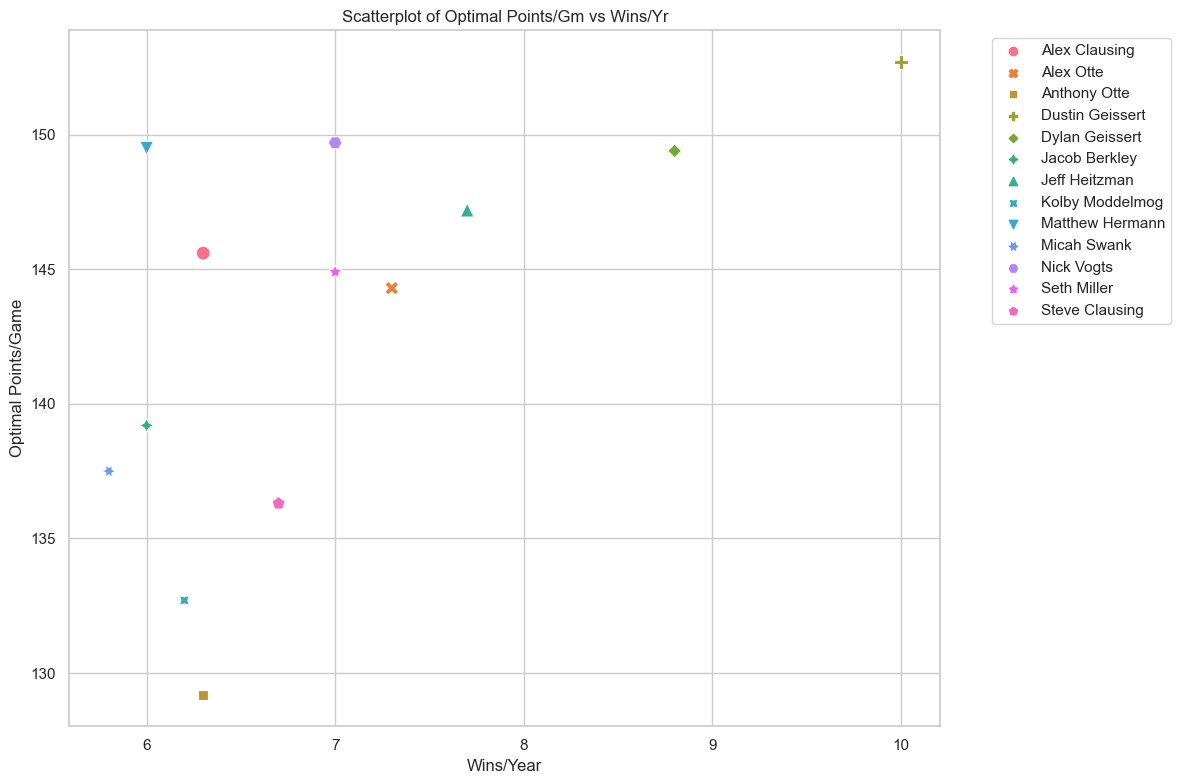

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the scatterplot
sns.scatterplot(data=df_Opts_Wins_Yrs, x='Wins/yr', y='Opts/gm', hue='Full Name', style='Full Name', s=100)

# Add titles and labels
plt.title('Scatterplot of Optimal Points/Gm vs Wins/Yr')
plt.xlabel('Wins/Year')
plt.ylabel('Optimal Points/Game')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

In [287]:
df_opts_wins = df_matchups_1.loc[df_matchups_1['Type']=='Regular'].groupby(['Full Name','Year'])[["Opts",'Actual_Winner']].sum().reset_index().sort_values(by='Opts',ascending=True)



In [288]:

df_opts_wins['Name_Yr'] = df_opts_wins['Full Name']+"_"+df_opts_wins['Year'].astype("str")

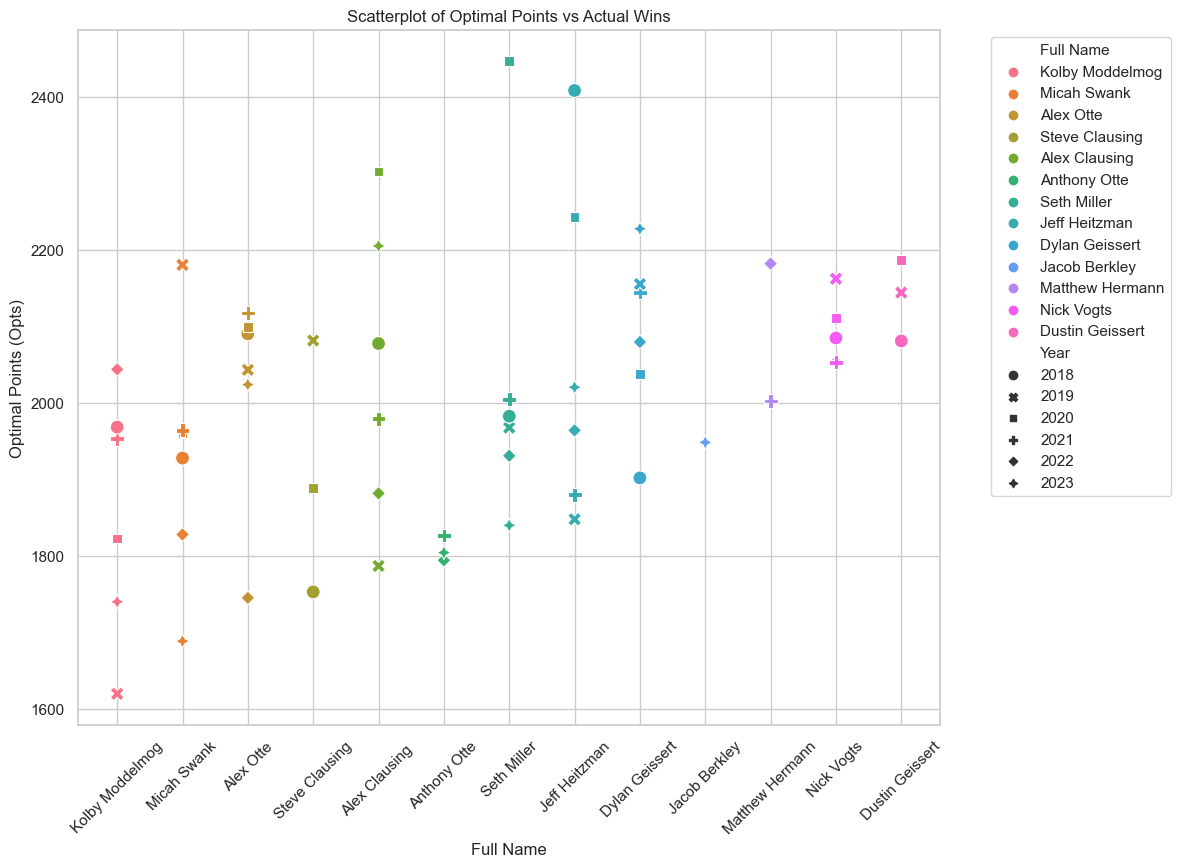

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the scatterplot
sns.scatterplot(data=df_opts_wins, x='Full Name', y='Opts', hue='Full Name', style='Year', s=100)

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Actual Wins')
plt.xlabel('Full Name')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()


In [290]:
#df_matchups_2

In [291]:
df_matchup_stats = df_matchups_2.loc[df_matchups_2['Type']=='Regular'].groupby(['Full Name',"Year"]).agg({
    'Optimal_Missed_Pts': 'sum',
    'Opts': 'sum',
    'Apts': 'sum',
    'Opponent_Opts': 'sum',
    'Opponent_Apts': 'sum',
    'Actual_Winner': 'sum',
    'Optimal_Winner': 'sum',
    'ESPN_Winner': 'sum',
    'Matchup_ID': 'count'}).reset_index()

In [292]:

df_matchup_stats['Adjusted_Wins'] = df_matchup_stats['Optimal_Winner']-df_matchup_stats['Actual_Winner']

In [293]:

df_matchup_stats['Name_Year'] = df_matchup_stats['Full Name'] + ' ' + df_matchup_stats['Year'].astype(str)

In [294]:

df_matchup_stats.sort_values(by='Adjusted_Wins', inplace=True)

In [295]:
df_mstats_short = df_matchup_stats.loc[(df_matchup_stats['Adjusted_Wins']>1)|(df_matchup_stats['Adjusted_Wins']< -1)]


In [296]:
#df_matchup_stats

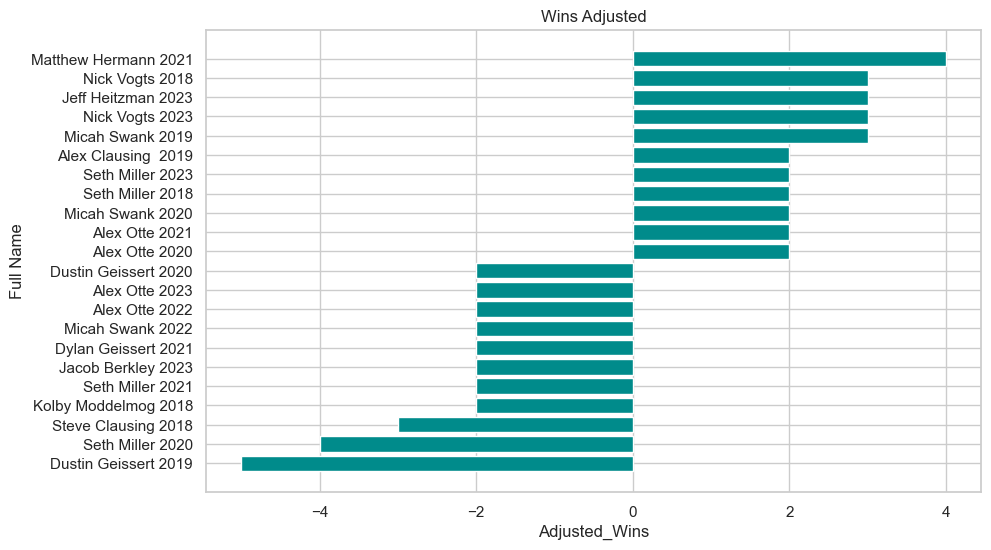

In [297]:
plt.figure(figsize=(10, 6))
plt.barh(df_mstats_short['Name_Year'], df_mstats_short['Adjusted_Wins'], color='darkcyan')
plt.xlabel('Adjusted_Wins')
plt.ylabel('Full Name')
plt.title('Wins Adjusted')
#plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
#plt.tight_layout()

# Show plot
plt.show()

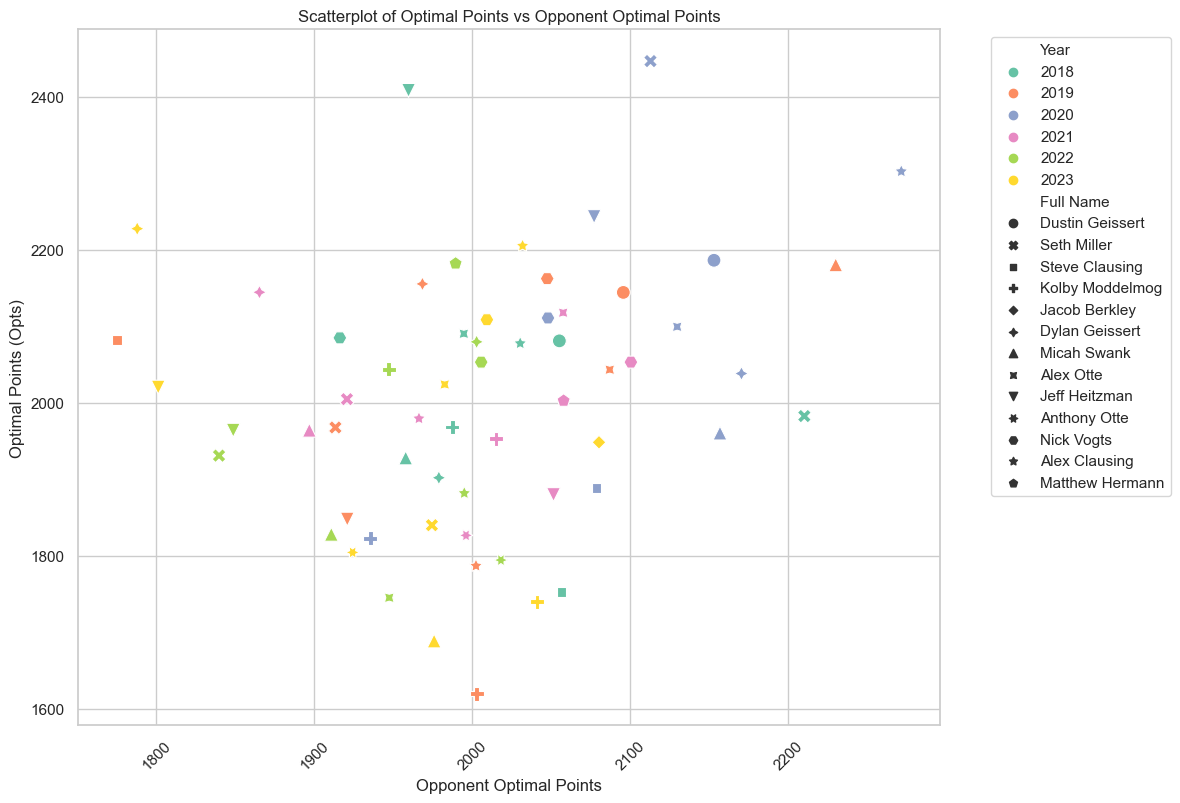

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Opponent_Opts', y='Opts', hue='Year', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Opponent Optimal Points')
plt.xlabel('Opponent Optimal Points')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [299]:
df_matchup_stats['Year'] = df_matchup_stats['Year'].astype("str")

In [300]:
yearly_avg = df_matchup_stats.groupby('Year')['Opponent_Opts'].mean().reset_index().rename(columns={'Opponent_Opts': 'Yearly_Avg_Opponent_Opts'})

In [301]:
df_matchup_stats = df_matchup_stats.merge(yearly_avg, on='Year')

In [302]:
df_matchup_stats['Diff_Opponent_Opts'] = df_matchup_stats['Opponent_Opts'] - df_matchup_stats['Yearly_Avg_Opponent_Opts']

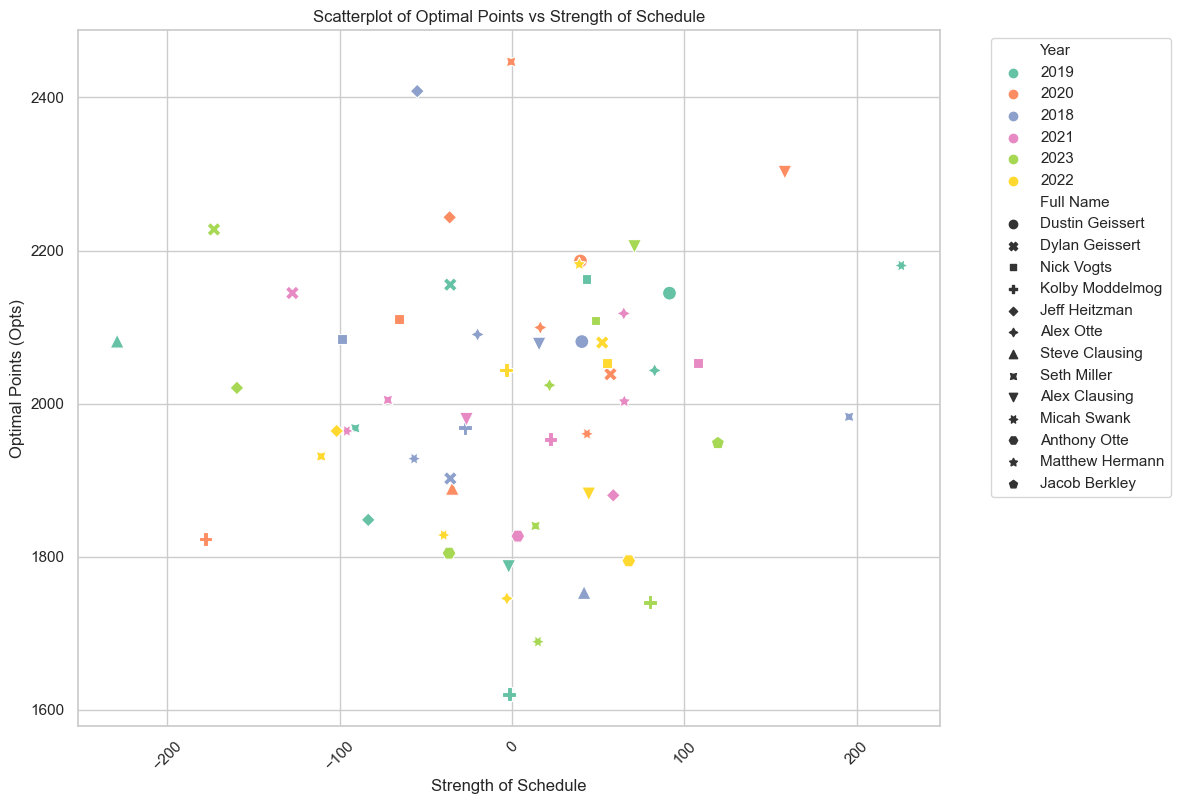

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Diff_Opponent_Opts', y='Opts', hue='Year', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Strength of Schedule')
plt.xlabel('Strength of Schedule')
plt.ylabel('Optimal Points (Opts)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [304]:
df_matchup_stats['Extra_Pts_Against/Game'] = df_matchup_stats['Diff_Opponent_Opts']/df_matchup_stats['Matchup_ID']

In [305]:
df_SoS = df_matchup_stats.groupby(['Full Name'])['Diff_Opponent_Opts'].sum().reset_index().sort_values(by='Diff_Opponent_Opts')

In [306]:
df_SoS_Yrs = df_Opts_Wins_Yrs.merge(df_SoS)

In [307]:
df_SoS_Yrs['Extra_Pts_Against/Game'] = df_SoS_Yrs['Diff_Opponent_Opts']/df_SoS_Yrs['Matchup_ID']

In [308]:
#df_matchup_stats

In [309]:
df_SoS_Yrs.loc[df_SoS_Yrs['Full Name']!='Jacob Berkley']

,Full Name,Opts,Actual_Winner,Optimal_Winner,Year,Matchup_ID,Opts/gm,Opts/yr,Wins/yr,Diff_Opponent_Opts,Extra_Pts_Against/Game
0,Alex Clausing,12233.7,38,40,6,84,145.6,2039.0,6.3,260.99,3.107024
1,Alex Otte,12120.1,44,44,6,84,144.3,2020.0,7.3,162.59,1.935595
2,Anthony Otte,5425.8,19,17,3,42,129.2,1808.6,6.3,34.42,0.819524
3,Dustin Geissert,6411.6,30,22,3,42,152.7,2137.2,10.0,171.47,4.082619
4,Dylan Geissert,12547.6,53,51,6,84,149.4,2091.3,8.8,-262.81,-3.128690
6,Jeff Heitzman,12364.5,46,49,6,84,147.2,2060.8,7.7,-377.51,-4.494167
7,Kolby Moddelmog,11148.7,37,34,6,84,132.7,1858.1,6.2,-107.71,-1.282262
8,Matthew Hermann,4184.9,12,16,2,28,149.5,2092.4,6.0,104.11,3.718214
9,Micah Swank,11550.1,35,38,6,84,137.5,1925.0,5.8,91.89,1.093929
10,Nick Vogts,12573.1,42,48,6,84,149.7,2095.5,7.0,90.49,1.077262


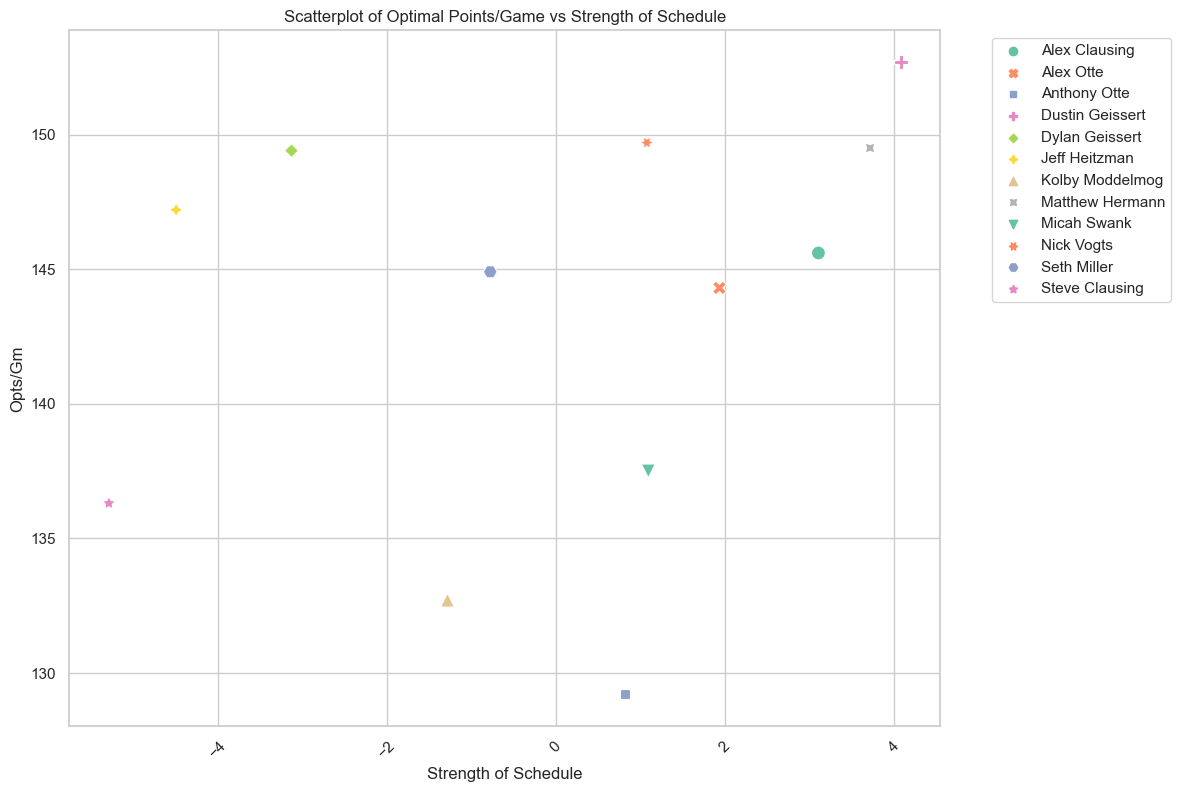

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
#sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_SoS_Yrs.loc[df_SoS_Yrs['Full Name']!='Jacob Berkley'], x='Extra_Pts_Against/Game', y='Opts/gm', hue='Full Name', style='Full Name', s=100, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Optimal Points/Game vs Strength of Schedule')
plt.xlabel('Strength of Schedule')
plt.ylabel('Opts/Gm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [311]:
df_SoS_Yrs['Win_Percentage'] = ((df_SoS_Yrs['Actual_Winner']/df_SoS_Yrs['Matchup_ID'])*100).round(2)
df_SoS_Yrs['Optimal_Win_Percentage'] = ((df_SoS_Yrs['Optimal_Winner']/df_SoS_Yrs['Matchup_ID'])*100).round(2)

In [312]:
df_SoS_Yrs

,Full Name,Opts,Actual_Winner,Optimal_Winner,Year,Matchup_ID,Opts/gm,Opts/yr,Wins/yr,Diff_Opponent_Opts,Extra_Pts_Against/Game,Win_Percentage,Optimal_Win_Percentage
0,Alex Clausing,12233.7,38,40,6,84,145.6,2039.0,6.3,260.99,3.107024,45.24,47.62
1,Alex Otte,12120.1,44,44,6,84,144.3,2020.0,7.3,162.59,1.935595,52.38,52.38
2,Anthony Otte,5425.8,19,17,3,42,129.2,1808.6,6.3,34.42,0.819524,45.24,40.48
3,Dustin Geissert,6411.6,30,22,3,42,152.7,2137.2,10.0,171.47,4.082619,71.43,52.38
4,Dylan Geissert,12547.6,53,51,6,84,149.4,2091.3,8.8,-262.81,-3.128690,63.10,60.71
5,Jacob Berkley,1948.4,6,4,1,14,139.2,1948.4,6.0,119.41,8.529286,42.86,28.57
6,Jeff Heitzman,12364.5,46,49,6,84,147.2,2060.8,7.7,-377.51,-4.494167,54.76,58.33
7,Kolby Moddelmog,11148.7,37,34,6,84,132.7,1858.1,6.2,-107.71,-1.282262,44.05,40.48
8,Matthew Hermann,4184.9,12,16,2,28,149.5,2092.4,6.0,104.11,3.718214,42.86,57.14
9,Micah Swank,11550.1,35,38,6,84,137.5,1925.0,5.8,91.89,1.093929,41.67,45.24


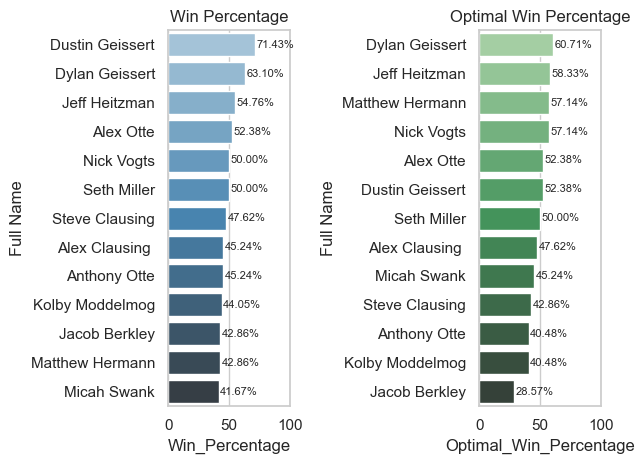

In [313]:
# Create the first subplot for Win Percentage
plt.subplot(1, 2, 1)
sns.barplot(x='Win_Percentage', y='Full Name', data=df_SoS_Yrs.sort_values(by="Win_Percentage",ascending=False), palette='Blues_d')
plt.title('Win Percentage')

plt.xlim(0, 100)

# Add percentage labels on the bars
for index, value in enumerate(df_SoS_Yrs.sort_values(by="Win_Percentage",ascending=False)['Win_Percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=8)

# Create the second subplot for Optimal Win Percentage
plt.subplot(1, 2, 2)
sns.barplot(x='Optimal_Win_Percentage', y='Full Name', data=df_SoS_Yrs.sort_values(by="Optimal_Win_Percentage",ascending=False), palette='Greens_d')
plt.title('Optimal Win Percentage')

plt.xlim(0, 100)

# Add percentage labels on the bars
for index, value in enumerate(df_SoS_Yrs.sort_values(by="Optimal_Win_Percentage",ascending=False)['Optimal_Win_Percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=8)


# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

In [314]:
df_matchup_stats['Opponenet Realized Pts %'] = ((df_matchup_stats['Opponent_Apts']/df_matchup_stats['Opponent_Opts'])*100).round(2)

In [315]:
df_matchup_stats['Realized Pts %'] = ((df_matchup_stats['Apts']/df_matchup_stats['Opts'])*100).round(2)

In [316]:
#df_matchup_stats

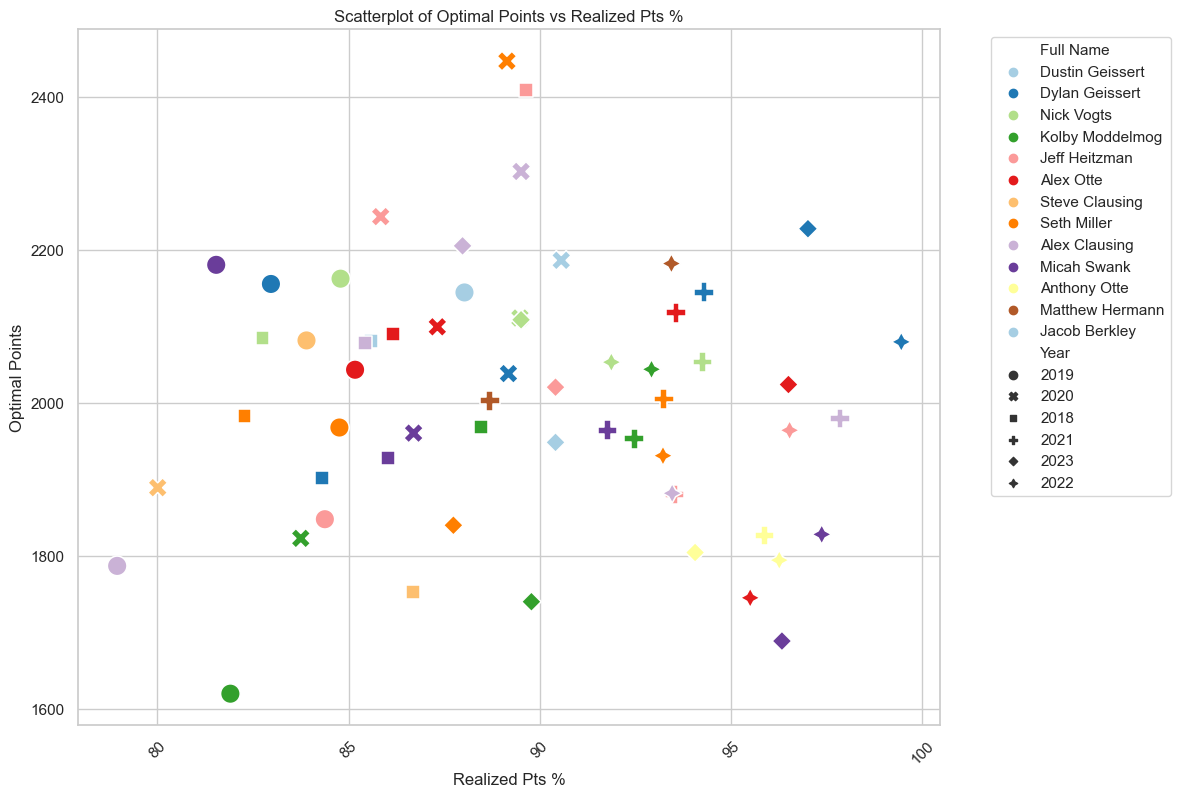

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.set_palette("Paired",14)

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Realized Pts %', y='Opts', hue='Full Name', style='Year', s=200)

# Add titles and labels
plt.title('Scatterplot of Optimal Points vs Realized Pts %')
plt.xlabel('Realized Pts %')
plt.ylabel('Optimal Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

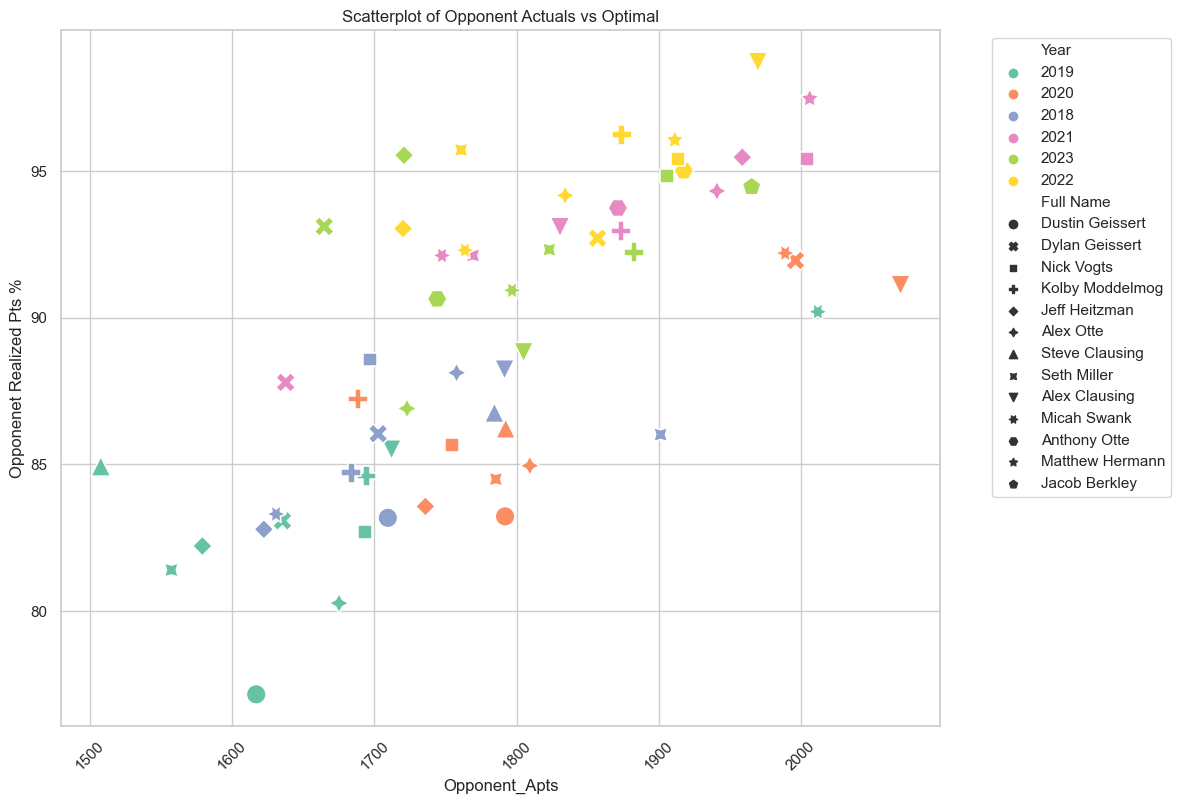

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=df_matchup_stats, x='Opponent_Apts', y='Opponenet Realized Pts %', hue='Year', style='Full Name', s=200, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Opponent Actuals vs Optimal')
plt.xlabel('Opponent_Apts')
plt.ylabel('Opponenet Realized Pts %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [330]:
df_pts_med = df_pts.groupby(['Year'])[['Opts','Apts']].median().reset_index().rename(columns={'Opts':'Opts_Lg','Apts':'Apts_Lg'})

In [331]:
df_pts_avg = df_pts.groupby(['Year','TeamID'])[['Opts','Apts']].mean().reset_index()

In [333]:
df_pts1 = df_pts_avg.merge(df_pts_med)

In [338]:
#Potential Reached

df_pts1['Optimized %'] = df_pts1['Apts']/df_pts1['Opts']
df_pts1['League OPT %'] = df_pts1['Apts_Lg']/df_pts1['Opts_Lg']

In [343]:
#Optiamal Points+
df_pts1['Opts+'] = (df_pts1['Opts']/df_pts1['Opts_Lg'])*100
df_pts1['Optimized+'] = (df_pts1['Optimized %']/df_pts1['League OPT %'])*100

In [349]:
df_pts2 = df_pts1.merge(tm_owners)

In [351]:
df_pts2['First'] = df_pts2['First'].str.capitalize()
df_pts2['Last'] = df_pts2['Last'].str.capitalize()

In [352]:
df_pts2.drop_duplicates(inplace=True)

In [353]:
df_pts2['Full Name'] = df_pts2['First'] + " "+ df_pts2['Last']

In [354]:

df_pts3 = df_pts2.loc[df_pts2['Full Name']!='Dave Miller']

In [355]:

df_pts3.loc[df_pts3['Full Name']=='Nick  Vgts','Full Name']="Nick Vogts"
df_pts3.loc[df_pts3['Full Name']=='Nick Vgts','Full Name']="Nick Vogts"

In [370]:
df_optimized = df_pts3.groupby(['Full Name'])[['Opts+','Optimized+']].mean().reset_index()

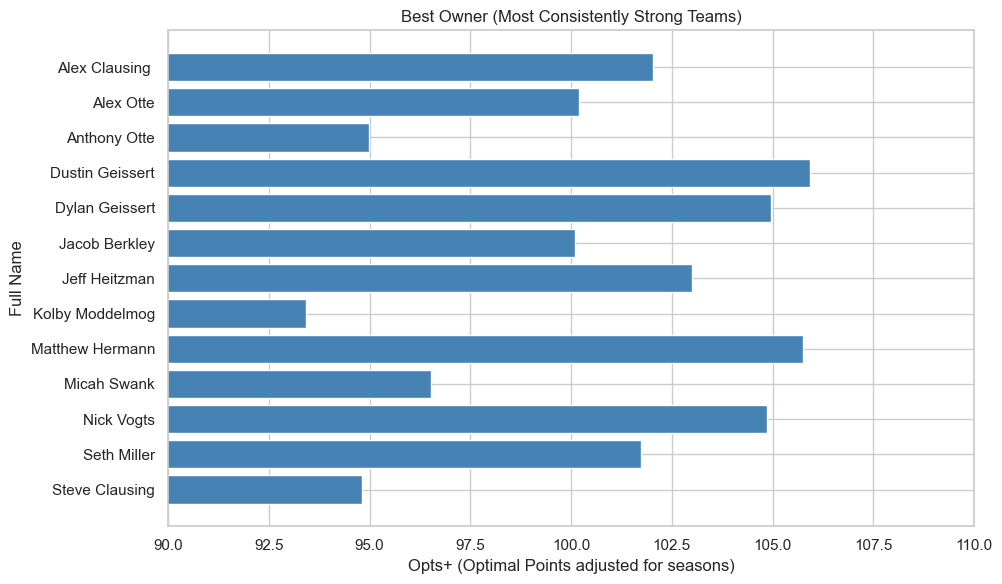

In [372]:
plt.figure(figsize=(10, 6))
plt.barh(df_optimized['Full Name'], df_optimized['Opts+'], color='steelblue')
plt.xlabel('Opts+ (Optimal Points adjusted for seasons)')
plt.ylabel('Full Name')
plt.title('Best Owner (Most Consistently Strong Teams)')
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest values at the top
plt.tight_layout()
# Use the current axis object to set the x-axis limits
ax = plt.gca()
ax.set_xlim(90, 110) 
# Show plot
plt.show()

In [458]:
df_pts_reg = df_pts.loc[((df_pts['Week']<15)&(df_pts['Year']>=2021))|((df_pts['Week']<14)&(df_pts['Year']<=2020))]

In [459]:
wk_pts_med = df_pts_reg.groupby(['Year','Week'])[['Opts','Apts']].median().reset_index().rename(columns={'Opts':'Opts_Lg','Apts':'Apts_Lg'})

In [460]:
wk_pts_avg = df_pts_reg.groupby(['Year','TeamID','Week'])[['Opts','Apts']].mean().reset_index()

In [461]:
wk_pts1 = wk_pts_avg.merge(wk_pts_med)

In [462]:
wk_pts1 = wk_pts1.merge(tm_owners)

In [463]:
wk_pts1['First'] = wk_pts1['First'].str.capitalize()
wk_pts1['Last'] = wk_pts1['Last'].str.capitalize()
wk_pts1.drop_duplicates(inplace=True)
wk_pts1['Full Name'] = wk_pts1['First'] + " "+ wk_pts1['Last']
wk_pts2 = wk_pts1.loc[wk_pts1['Full Name']!='Dave Miller']

wk_pts2.loc[wk_pts2['Full Name']=='Nick  Vgts','Full Name']="Nick Vogts"
wk_pts2.loc[wk_pts2['Full Name']=='Nick Vgts','Full Name']="Nick Vogts"

In [464]:
wk_ptsH = wk_pts2.merge(df_sch, left_on=['Year','TeamID','Week'], right_on=['Year','HomeTeamId','Week'])

In [465]:
wk_ptsA = wk_pts2.merge(df_sch, left_on=['Year','TeamID','Week'], right_on=['Year','AwayTeamId','Week'])

In [466]:
wk_ptsH1 = wk_ptsA[['Year', 'TeamID','Full Name', 'Week', 'Opts', 'Apts', 'Opts_Lg', 'Apts_Lg',
       'HomeTeamId', 'HomeTotalPoints',
       'Type', 'Matchup_ID']].rename(columns={ 'HomeTeamId':'OppID', 'HomeTotalPoints':'OppApts'})

In [467]:
wk_ptsA1 = wk_ptsH[['Year', 'TeamID','Full Name', 'Week', 'Opts', 'Apts', 'Opts_Lg', 'Apts_Lg', 'AwayTeamId', 'AwayTotalPoints',
       'Type', 'Matchup_ID']].rename(columns={ 'AwayTeamId':'OppID', 'AwayTotalPoints':'OppApts'})

In [468]:
wk_pts_opp = pd.concat([wk_ptsA1,wk_ptsH1])

In [469]:
wk_pts_opp['PoorOpp']=0
wk_pts_opp['LuckyWin']=0
wk_pts_opp['UnluckyLoss']=0

wk_pts_opp.loc[wk_pts_opp['OppApts']<wk_pts_opp['Apts_Lg'],'PoorOpp']=1
wk_pts_opp.loc[(wk_pts_opp['OppApts']<wk_pts_opp['Apts_Lg'])&(wk_pts_opp['Apts']<wk_pts_opp['Apts_Lg'])&(wk_pts_opp['Apts']>wk_pts_opp['OppApts']),'LuckyWin']=1
wk_pts_opp.loc[(wk_pts_opp['OppApts']>wk_pts_opp['Apts_Lg'])&(wk_pts_opp['Apts']>wk_pts_opp['Apts_Lg'])&(wk_pts_opp['Apts']<wk_pts_opp['OppApts']),'UnluckyLoss']=1

In [495]:
yr_opp = wk_pts_opp.groupby(['Full Name','Year'])[['PoorOpp','LuckyWin','UnluckyLoss']].sum().reset_index()

In [496]:
yr_opp['LuckFactor'] = yr_opp['LuckyWin']-yr_opp['UnluckyLoss']

In [497]:
yr_opp['PoorOpp_LgAvg'] = yr_opp['PoorOpp'].mean().round(1)
yr_opp['LuckyWin_LgAvg'] = yr_opp['LuckyWin'].mean().round(1)
yr_opp['UnluckyLoss_LgAvg'] = yr_opp['UnluckyLoss'].mean().round(1)
yr_opp['LuckFactor_LgAvg'] = yr_opp['LuckFactor'].mean().round(1)

# CRAZY STAT

In [498]:
yr_opp['UnluckyLoss'].sum()

95

In [499]:
yr_opp['LuckyWin'].sum()

96

In [502]:
yr_opp['PoorOpp+'] = (yr_opp['PoorOpp']/yr_opp['PoorOpp_LgAvg'])*100
yr_opp['LuckyWin+'] = (yr_opp['LuckyWin']/yr_opp['LuckyWin_LgAvg'])*100
yr_opp['UnluckyLoss+'] = (yr_opp['UnluckyLoss']/yr_opp['UnluckyLoss_LgAvg'])*100


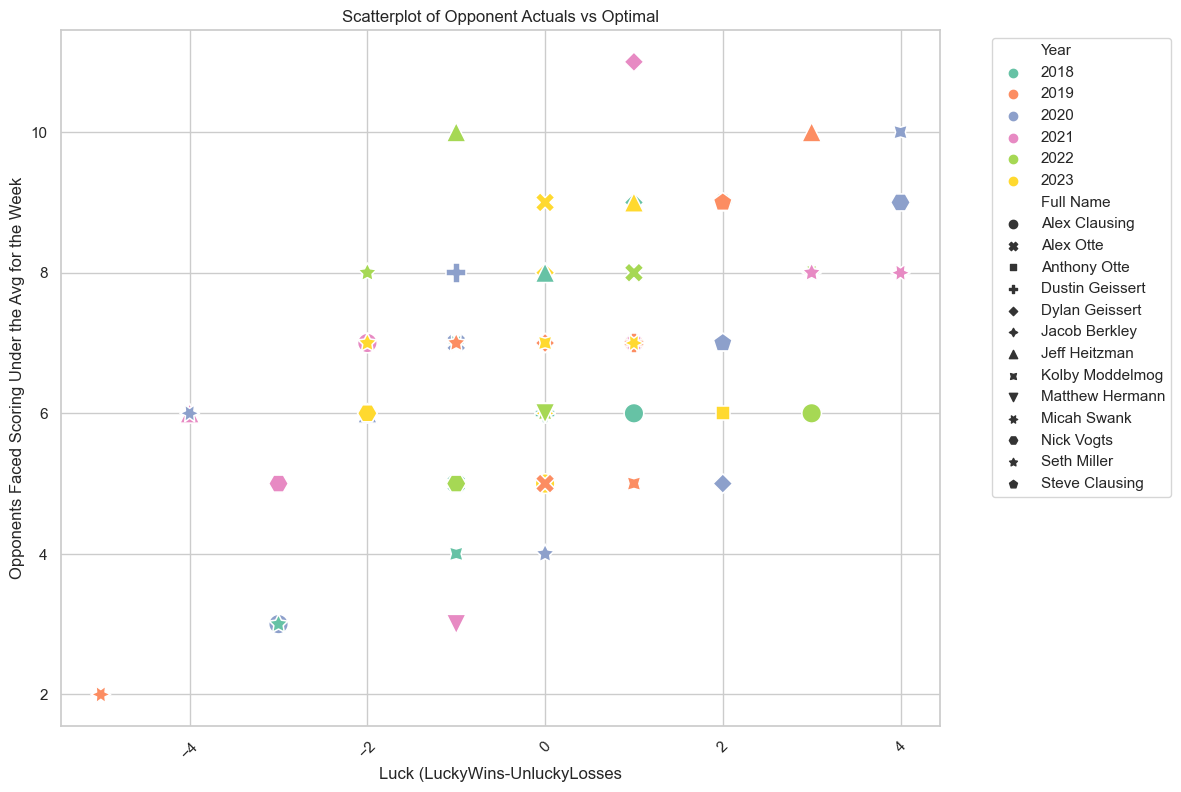

In [531]:
# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.set_palette("dark")

# Create the scatterplot
sns.scatterplot(data=yr_opp, x='LuckFactor', y='PoorOpp', hue='Year', style='Full Name', s=200, palette='Set2')

# Add titles and labels
plt.title('Scatterplot of Opponent Actuals vs Optimal')
plt.xlabel('Luck (LuckyWins-UnluckyLosses')
plt.ylabel('Opponents Faced Scoring Under the Avg for the Week')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=45)


# Display the plot
plt.show()

In [521]:
ovr_details = yr_opp.groupby('Full Name')[['PoorOpp','LuckyWin','UnluckyLoss','LuckFactor']].sum().reset_index().merge(df_Opts_Wins_Yrs)

In [528]:
ovr_details['PoorOpp_rate'] = ((ovr_details['PoorOpp']/ovr_details['Matchup_ID'])*100).round(2)
ovr_details['LuckyWin_rate'] = ((ovr_details['LuckyWin']/ovr_details['Matchup_ID'])*100).round(2)
ovr_details['UnluckyLoss_rate'] = ((ovr_details['UnluckyLoss']/ovr_details['Matchup_ID'])*100).round(2)

In [529]:
ovr_details[['Full Name', 'PoorOpp', 'LuckyWin', 'UnluckyLoss', 'LuckFactor', 'Year', 'Matchup_ID', 'Opts/gm',
       'Opts/yr', 'Wins/yr', 'PoorOpp_rate', 'LuckyWin_rate',
       'UnluckyLoss_rate']]

,Full Name,PoorOpp,LuckyWin,UnluckyLoss,LuckFactor,Year,Matchup_ID,Opts/gm,Opts/yr,Wins/yr,PoorOpp_rate,LuckyWin_rate,UnluckyLoss_rate
0,Alex Clausing,34,9,9,0,6,84,145.6,2039.0,6.3,40.48,10.71,10.71
1,Alex Otte,42,7,7,0,6,84,144.3,2020.0,7.3,50.00,8.33,8.33
2,Anthony Otte,20,6,3,3,3,42,129.2,1808.6,6.3,47.62,14.29,7.14
3,Dustin Geissert,21,5,5,0,3,42,152.7,2137.2,10.0,50.00,11.90,11.90
4,Dylan Geissert,45,8,7,1,6,84,149.4,2091.3,8.8,53.57,9.52,8.33
5,Jacob Berkley,6,1,1,0,1,14,139.2,1948.4,6.0,42.86,7.14,7.14
6,Jeff Heitzman,49,9,12,-3,6,84,147.2,2060.8,7.7,58.33,10.71,14.29
7,Kolby Moddelmog,38,12,8,4,6,84,132.7,1858.1,6.2,45.24,14.29,9.52
8,Matthew Hermann,9,3,4,-1,2,28,149.5,2092.4,6.0,32.14,10.71,14.29
9,Micah Swank,38,12,14,-2,6,84,137.5,1925.0,5.8,45.24,14.29,16.67
